# Title: Collecting Pauli's

The Hamiltoniain I am studying in this folder is
\begin{equation}
\begin{split}
H_{c,c'}=& T_{c,c'} + \delta_{cc'}\sum_{i=0}^{N_q-1} \left(x X_{i}X_{i+1} + y Y_{i} Y_{i+1}  + z Z_{i} Z_{i+1}\right) 
\\
&+ \left(B^{1x}_{c,c'}X_{0} + B^{1y}_{c,c'} Y_{0} + B^{1z}_{c,c'} Z_{0} \right)
\end{split}
\end{equation}

Instead of measuring each one of these terms seperately, we can group terms which commute and measure them simultaniously.  To do this we need first to define the groups and then to find the basis in which they can be simulataniously measured.  

There will only ever be three boundry terms $X_0$, $Y_0$ and $Z_0, therefore, I will not worry about them.  Each boundary term will be in its own commutivity group and will be measured seperately.  

The identity term commutes with all other operators so it can be put in any group. 

The majority of the terms are paired terms $X_iX_{i+1}$, $Y_iY_{i+1}$, $Z_iZ_{i+1}$.  If we measure each one seperately, that is $3N_q$ measurements that need to be performed.  We can reduce this to just two measurments by grouping all of the even $i$ terms together and all of the odd $i$ terms together.  For example, for $N_q = 6$ we have the even group:
$$ G_E = \{X_0X_1, X_2X_3, X_4X_5, Y_0Y_1, Y_2Y_3, Y_4Y_5, Z_0Z_1, Z_2Z_3, Z_4Z_5\} $$
and the odd group:
$$ G_O = \{ X_1X_2, X_3X_4, Y_1Y_2, Y_3Y_4, Z_1Z_2, Z_3Z_4 \} $$

# Some helpful functions

In [88]:
import qiskit.quantum_info as qi

def I(N):
    label = ['I' for i in range(N)]
    label = ''.join(label)
    return qi.Operator.from_label(label).data

def X(i,N):
    label = ['I' for i in range(N)]
    label[i] = 'X'
    label = ''.join(label)
    return qi.Operator.from_label(label).data

def Y(i,N):
    label = ['I' for i in range(N)]
    label[i] = 'Y'
    label = ''.join(label)
    return qi.Operator.from_label(label).data

def Z(i,N):
    label = ['I' for i in range(N)]
    label[i] = 'Z'
    label = ''.join(label)
    return qi.Operator.from_label(label).data

import numpy as np

def Mdot(Ol):
    out = Ol[0]
    for i in range(1,len(Ol)):
        out = np.dot(Ol[i],out)
    return out

def bkt(y1,O,y2):
    return Mdot([np.conjugate(y1),O,y2])

def Cnot(i,j,N):
    return 1/2*(I(N) + Z(i,N) + X(j,N) - Mdot([Z(i,N),X(j,N)]))

def Had(i,N):
    return 1/np.sqrt(2)*(X(i,N) + Z(i,N))

# Check Comutivity

Let us check that each group contains commuting terms.

$$ G_E = \{X_0X_1, X_2X_3, X_4X_5, Y_0Y_1, Y_2Y_3, Y_4Y_5, Z_0Z_1, Z_2Z_3, Z_4Z_5\} $$

$$ G_O = \{ X_1X_2, X_3X_4, Y_1Y_2, Y_3Y_4, Z_1Z_2, Z_3Z_4 \} $$

In [6]:
#GE
x0x1 = Mdot([X(0,6),X(1,6)])
x2x3 = Mdot([X(2,6),X(3,6)])
x4x5 = Mdot([X(4,6),X(5,6)])
y0y1 = Mdot([Y(0,6),Y(1,6)])
y2y3 = Mdot([Y(2,6),Y(3,6)])
y4y5 = Mdot([Y(4,6),Y(5,6)])
z0z1 = Mdot([Z(0,6),Z(1,6)])
z2z3 = Mdot([Z(2,6),Z(3,6)])
z4z5 = Mdot([Z(4,6),Z(5,6)])

#GO
x1x2 = Mdot([X(1,6),X(2,6)])
x3x4 = Mdot([X(3,6),X(4,6)])
y1y2 = Mdot([Y(1,6),Y(2,6)])
y3y4 = Mdot([Y(3,6),Y(4,6)])
z1z2 = Mdot([Z(1,6),Z(2,6)])
z3z4 = Mdot([Z(3,6),Z(4,6)])

In [17]:
print(np.amax(np.abs(Mdot([x0x1,x2x3]) - Mdot([x2x3,x0x1])))) #same type differnt sites
print(np.amax(np.abs(Mdot([x0x1,y2y3]) - Mdot([y2y3,x0x1])))) #different type different sites
print(np.amax(np.abs(Mdot([x0x1,y0y1]) - Mdot([y0y1,x0x1])))) #different type same sites

0.0
0.0
0.0


# Find the shared basis

Any pair can be transformed into the measurment basis by the application of a CNOT gate and a Hadamard gate.

$$ <H_iC_{ij} X_iX_j C_{ij}H_i> = Z_i$$
$$ <H_iC_{ij} Z_iZ_j C_{ij}H_i> = Z_j$$
$$ <H_iC_{ij} Y_iY_j C_{ij}H_i> = -Z_iZ_j$$

In [101]:
print(np.amax(np.abs(Mdot([Cnot(1,2,6),x1x2,Cnot(1,2,6)]) - X(1,6))))
print(np.amax(np.abs(Mdot([Cnot(1,2,6),z1z2,Cnot(1,2,6)]) - Z(2,6) ))) 
print(np.amax(np.abs(Mdot([Cnot(1,2,6),y1y2,Cnot(1,2,6)]) + Mdot([X(1,6),Z(2,6)]) ))) 

0.0
0.0
0.0


In [102]:
print(np.amax(np.abs( Mdot([Had(1,6),Cnot(1,2,6),x1x2,Cnot(1,2,6),Had(1,6)])-Z(1,6) )))
print(np.amax(np.abs( Mdot([Had(1,6),Cnot(1,2,6),z1z2,Cnot(1,2,6),Had(1,6)])-Z(2,6) ))) 
print(np.amax(np.abs( Mdot([Had(1,6),Cnot(1,2,6),y1y2,Cnot(1,2,6),Had(1,6)])+Mdot([Z(1,6),Z(2,6)]) ))) 

2.220446049250313e-16
2.220446049250313e-16
2.220446049250313e-16


So the total basis rotation is generated by applying $C_{i,i+1}H_i$ to all even $i$ value for GE and all odd $i$ values for GO.  The circuits for the $N_q = 6$ example are drawn below.

In [104]:
from qiskit import QuantumCircuit, QuantumRegister,ClassicalRegister

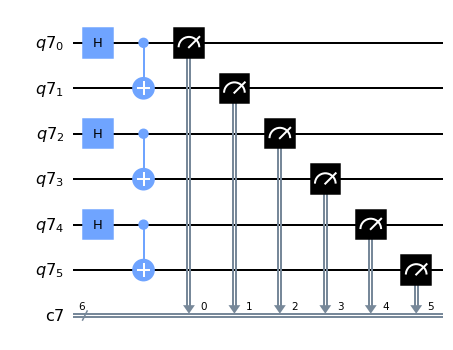

In [112]:
N_q = 6
qr = QuantumRegister(N_q)
cr = ClassicalRegister(N_q)
cir_E = QuantumCircuit(qr , cr)
for i in range(0,N_q,2):
    cir_E.h(i)
    cir_E.cx(i,i+1)
cir_E.measure(qr,cr)
cir_E.draw(output = 'mpl')

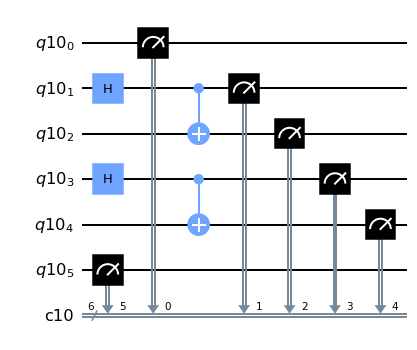

In [115]:
N_q = 6
qr = QuantumRegister(N_q)
cr = ClassicalRegister(N_q)
cir_O = QuantumCircuit(qr , cr)
for i in range(1,N_q-1,2):
    cir_O.h(i)
    cir_O.cx(i,i+1)
cir_O.measure(qr,cr)
cir_O.draw(output = 'mpl')

This transforms GE and GO as follows:
$$ G_E = \{X_0X_1, X_2X_3, X_4X_5, Y_0Y_1, Y_2Y_3, Y_4Y_5, Z_0Z_1, Z_2Z_3, Z_4Z_5\} \rightarrow \{Z_0, Z_2, Z_4, Z_0Z_1, Z_2Z_3, Z_4Z_5, Z_1, Z_3, Z_5\}$$

$$ G_O = \{ X_1X_2, X_3X_4, Y_1Y_2, Y_3Y_4, Z_1Z_2, Z_3Z_4 \} \rightarrow \{ Z_1, Z_3, Z_1Z_2, Z_3Z_4, Z_2, Z_4 \} $$